# **IMPORT AND READING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv')

# **DATA UNDERSTANDING**

In [3]:
df.shape

(2514, 15)

In [4]:
df.head(5)

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [5]:
df.tail(5)

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [6]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

In [7]:
df.dtypes

review_id              int64
user_id                int64
app_name              object
app_category          object
review_text           object
review_language       object
rating               float64
review_date           object
verified_purchase       bool
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

In [8]:
df.describe()

,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,616.704057,44.247812
std,725.873612,2.846939e+06,1.149955,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


# **DATA PREPARATION**

In [9]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

In [10]:
df = df[[ #'review_id', 'user_id', 
          'app_name', 'app_category', 
          #'review_text', 'review_language', 
          'rating', 'review_date', #'verified_purchase',
          'device_type', 'num_helpful_votes', 
          'user_age', 'user_country',
          'user_gender', 'app_version'
        ]].copy()

In [11]:
df.shape

(2514, 10)

In [12]:
df.dtypes

app_name              object
app_category          object
rating               float64
review_date           object
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

In [13]:
df.head(5)

,app_name,app_category,rating,review_date,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,MX Player,Travel & Local,1.3,2024-10-09 19:26:40,Android Tablet,65,14.0,China,Female,1.4
1,Tinder,Navigation,1.6,2024-06-21 17:29:40,iPad,209,18.0,Germany,Male,8.9
2,Netflix,Dating,3.6,2024-10-31 13:47:12,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,Venmo,Productivity,3.8,2025-03-12 06:16:22,iOS,664,66.0,India,Female,10.2
4,Google Drive,Education,3.2,2024-04-21 03:48:27,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [14]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [15]:
df['num_helpful_votes'] = pd.to_numeric(df['num_helpful_votes'])

In [16]:
df['user_age'] = df['user_age'].astype(int)

In [17]:
df.dtypes

app_name                     object
app_category                 object
rating                      float64
review_date          datetime64[ns]
device_type                  object
num_helpful_votes             int64
user_age                      int64
user_country                 object
user_gender                  object
app_version                  object
dtype: object

In [18]:
#rename our columns
df = df.rename(columns={'app_name' : 'App_Name',
                        'app_category' : 'App_Category',
                        'rating' : 'Rating',
                        'review_date' : 'Review_Date_and_Time',
                        'device_type' : 'Device_Type',
                        'num_helpful_votes' : 'Helpful_Votes_Count',
                        'user_age' : 'User_Age',
                        'user_country' : 'User_Country',
                        'user_gender' : 'User_Gender',
                        'app_version' : 'App_Version'
                       })


In [19]:
df.isna().sum()

App_Name                  0
App_Category              0
Rating                   37
Review_Date_and_Time      0
Device_Type               0
Helpful_Votes_Count       0
User_Age                  0
User_Country             41
User_Gender             587
App_Version              30
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.loc[df.duplicated()]

,App_Name,App_Category,Rating,Review_Date_and_Time,Device_Type,Helpful_Votes_Count,User_Age,User_Country,User_Gender,App_Version


In [22]:
df.columns

Index(['App_Name', 'App_Category', 'Rating', 'Review_Date_and_Time',
       'Device_Type', 'Helpful_Votes_Count', 'User_Age', 'User_Country',
       'User_Gender', 'App_Version'],
      dtype='object')

In [23]:
df.duplicated(subset=['App_Name', 'App_Category', 'Rating', 'Review_Date_and_Time']).sum()

0

# **FEATURE UNDERSTANDING**

In [24]:
df['App_Name'].value_counts()

App_Name
Pinterest           80
Reddit              80
Google Drive        76
OneDrive            74
MX Player           72
Instagram           72
Dropbox             70
Telegram            68
Microsoft Office    68
Adobe Photoshop     68
Grammarly           66
YouTube             66
Airbnb              65
Uber                64
Waze                64
Google Maps         63
TikTok              63
Netflix             62
Booking.com         62
Tinder              62
PayPal              61
Zoom                60
Coursera            59
Twitter             59
WhatsApp            59
Canva               57
Duolingo            57
eBay                57
LinkedIn            56
Bumble              56
Signal              56
Lyft                55
Amazon              54
Khan Academy        54
Udemy               52
Facebook            52
Spotify             51
Snapchat            51
Venmo               50
VLC                 49
Discord             44
Name: count, dtype: int64

Text(0, 0.5, 'Count of App Reviews')

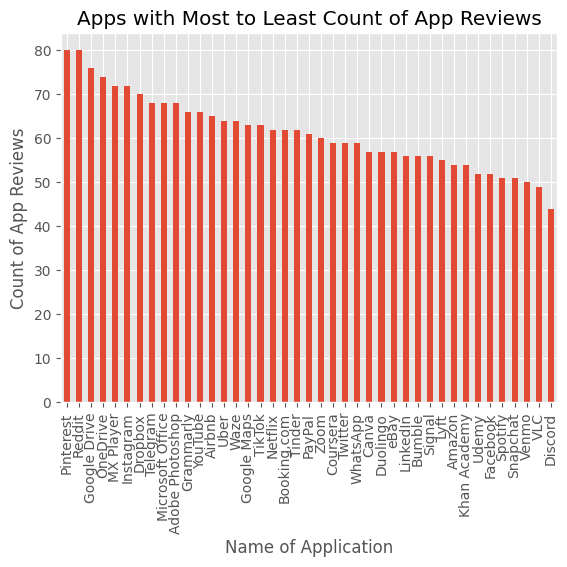

In [25]:
ax = df['App_Name'].value_counts() \
    .plot(kind='bar', title='Apps with Most to Least Count of App Reviews')
ax.set_xlabel("Name of Application")
ax.set_ylabel("Count of App Reviews")

Text(0, 0.5, 'Count of App Reviews')

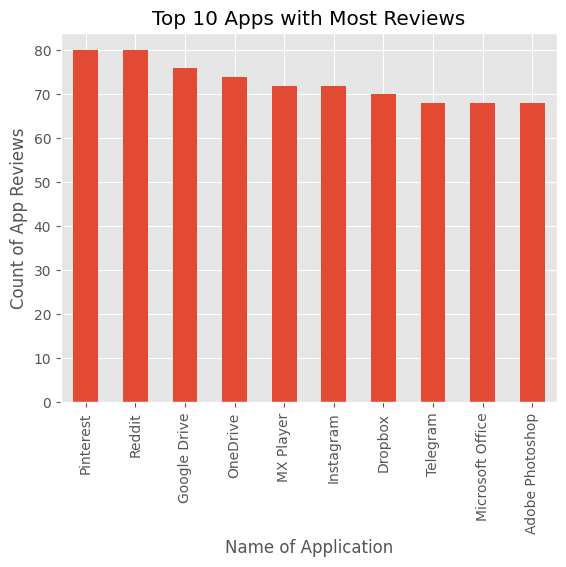

In [26]:
ax = df['App_Name'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Apps with Most Reviews')
ax.set_xlabel("Name of Application")
ax.set_ylabel("Count of App Reviews")

Text(0, 0.5, 'Count of App Reviews')

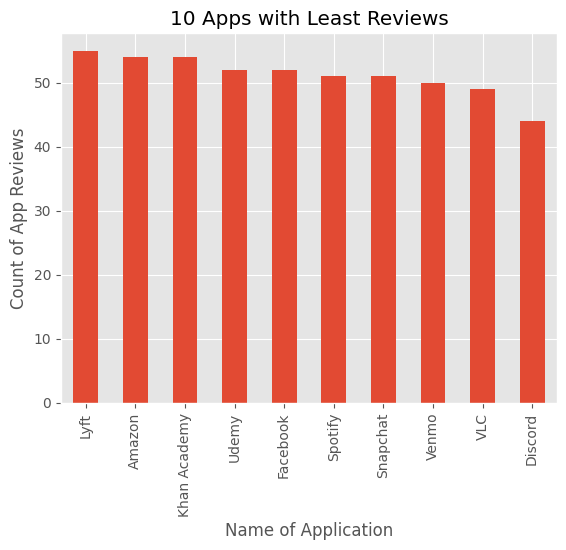

In [27]:
ax = df['App_Name'].value_counts() \
    .tail(10) \
    .plot(kind='bar', title='10 Apps with Least Reviews')
ax.set_xlabel("Name of Application")
ax.set_ylabel("Count of App Reviews")

In [28]:
## FEATURE RELATIONSHIP

In [29]:
df_corr = df[['Rating', 'Helpful_Votes_Count','User_Age', 'Review_Date_and_Time']]
df_corr

,Rating,Helpful_Votes_Count,User_Age,Review_Date_and_Time
0,1.3,65,14,2024-10-09 19:26:40
1,1.6,209,18,2024-06-21 17:29:40
2,3.6,163,67,2024-10-31 13:47:12
3,3.8,664,66,2025-03-12 06:16:22
4,3.2,1197,40,2024-04-21 03:48:27
...,...,...,...,...
2509,3.0,635,21,2023-11-23 01:07:30
2510,1.9,1127,38,2025-06-05 16:42:20
2511,3.4,677,27,2024-06-15 05:02:18
2512,2.7,155,35,2023-12-02 01:41:31


In [30]:
df_corr = df[['Rating', 'Helpful_Votes_Count','User_Age', 'Review_Date_and_Time']].dropna()
df_corr

,Rating,Helpful_Votes_Count,User_Age,Review_Date_and_Time
0,1.3,65,14,2024-10-09 19:26:40
1,1.6,209,18,2024-06-21 17:29:40
2,3.6,163,67,2024-10-31 13:47:12
3,3.8,664,66,2025-03-12 06:16:22
4,3.2,1197,40,2024-04-21 03:48:27
...,...,...,...,...
2509,3.0,635,21,2023-11-23 01:07:30
2510,1.9,1127,38,2025-06-05 16:42:20
2511,3.4,677,27,2024-06-15 05:02:18
2512,2.7,155,35,2023-12-02 01:41:31


In [31]:
df_corr = df[['Rating', 'Helpful_Votes_Count','User_Age', 'Review_Date_and_Time']].dropna().corr()
df_corr

,Rating,Helpful_Votes_Count,User_Age,Review_Date_and_Time
Rating,1.000000,0.009426,0.017194,-0.001491
Helpful_Votes_Count,0.009426,1.000000,-0.012298,0.000919
User_Age,0.017194,-0.012298,1.000000,0.011984
Review_Date_and_Time,-0.001491,0.000919,0.011984,1.000000


<Axes: >

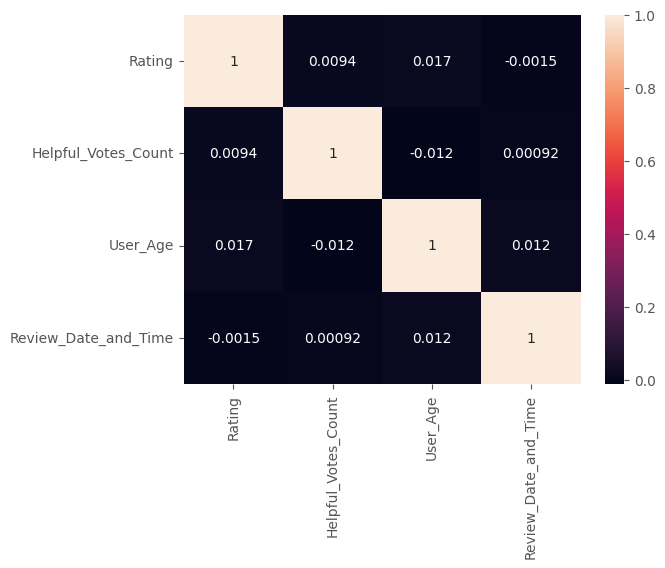

In [32]:
sns.heatmap(df_corr, annot=True)

/tmp/ipykernel_13/1269229509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Helpful_Votes_Count'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Helpful_Votes_Count', ylabel='Density'>

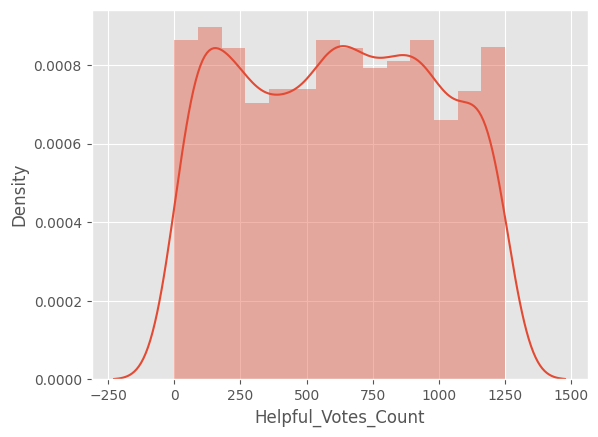

In [33]:
sns.distplot(df['Helpful_Votes_Count'])

/tmp/ipykernel_13/4288244173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['User_Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='User_Age', ylabel='Density'>

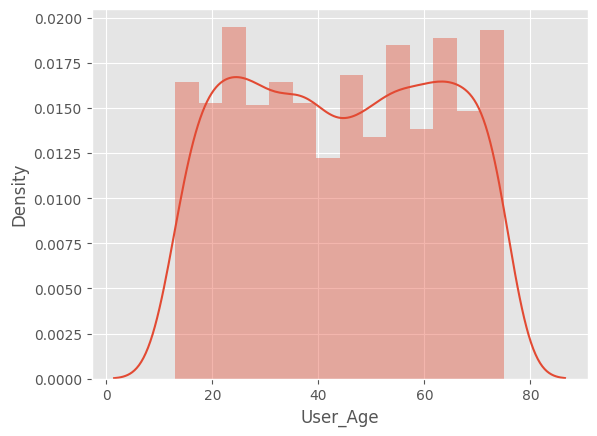

In [34]:
sns.distplot(df['User_Age'])

# **Ask a Question About the Data**

* What are the Apps with the most collected app ratings?
* What are the Apps with the highest app ratings?

In [35]:
df.columns

Index(['App_Name', 'App_Category', 'Rating', 'Review_Date_and_Time',
       'Device_Type', 'Helpful_Votes_Count', 'User_Age', 'User_Country',
       'User_Gender', 'App_Version'],
      dtype='object')

In [36]:
df.groupby('App_Name')['Rating'] \
  .agg(['mean','count']) \
  .sort_values('mean')['mean'] 

App_Name
Tinder              2.713115
Adobe Photoshop     2.789706
Twitter             2.801695
Booking.com         2.816393
Waze                2.856250
PayPal              2.868333
Zoom                2.885000
LinkedIn            2.918868
Coursera            2.919298
Udemy               2.935294
Airbnb              2.938095
Google Maps         2.958065
Facebook            2.972549
MX Player           2.974286
Duolingo            2.978182
Netflix             2.985246
eBay                2.985965
Signal              2.996429
Pinterest           3.007692
Canva               3.015789
Instagram           3.019718
Venmo               3.022449
TikTok              3.028571
Bumble              3.051786
Telegram            3.058209
Amazon              3.059259
YouTube             3.062121
Microsoft Office    3.064706
Reddit              3.084810
Google Drive        3.090541
Lyft                3.090741
Dropbox             3.118841
WhatsApp            3.129310
Discord             3.130952
Spoti

Text(0.5, 0, 'Average App Rating')

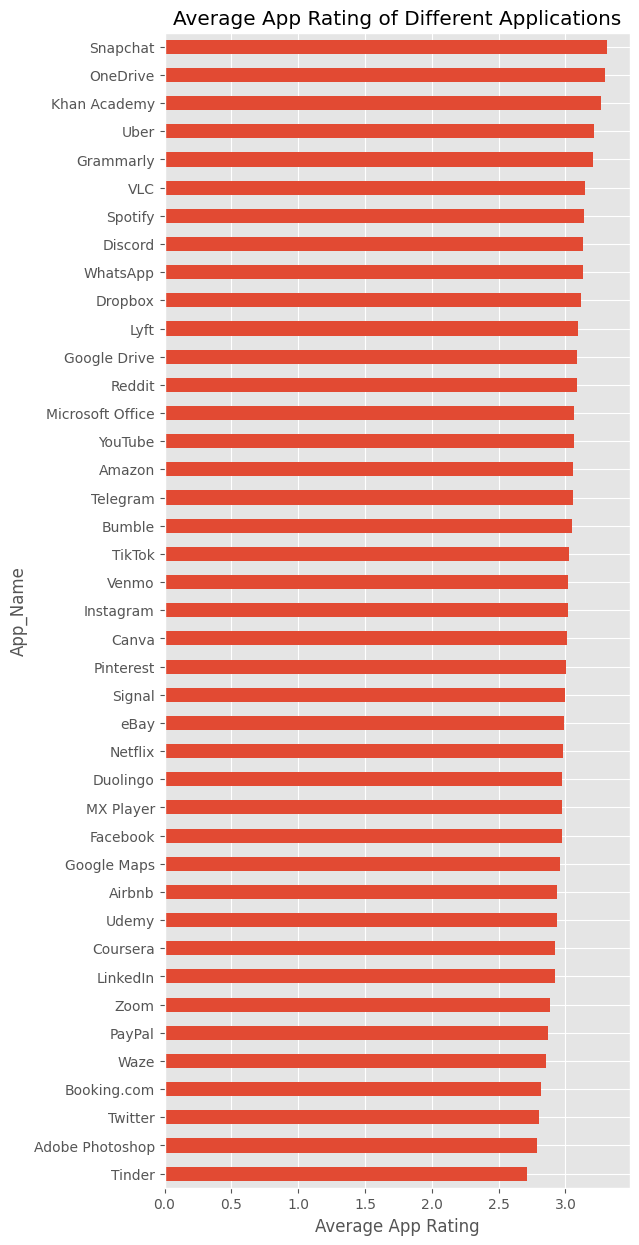

In [37]:
ax = df.groupby('App_Name')['Rating'] \
       .agg(['mean','count']) \
       .sort_values('mean')['mean'] \
       .plot(kind='barh', figsize=(6,15), title='Average App Rating of Different Applications' )
ax.set_xlabel('Average App Rating') 

Text(0.5, 0, 'Count of Collected App Ratings')

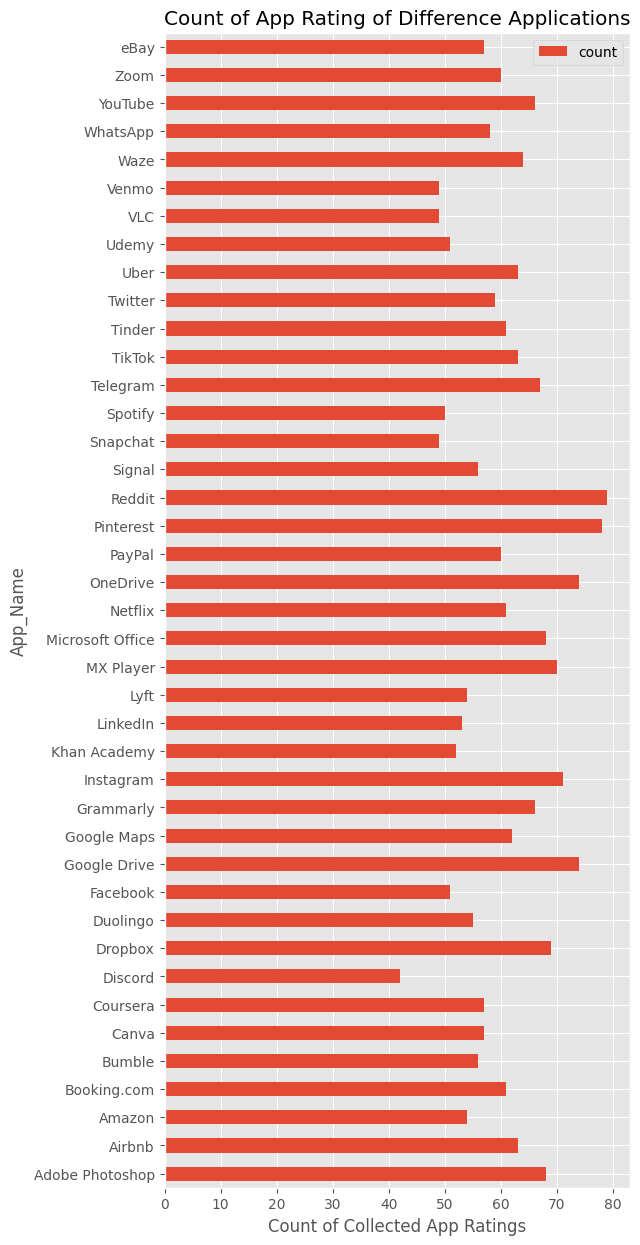

In [38]:
ax = df.groupby('App_Name')['Rating'] \
       .agg(['count']) \
       .plot(kind='barh', figsize=(6,15), title='Count of App Rating of Difference Applications' )
ax.set_xlabel('Count of Collected App Ratings') 